In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
from IPython.core.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL
from sklearn.decomposition import PCA

In [2]:
from book_funcs import category_cleaner,df_cleaner, category_compliter, zero_droper, category_embedding, pca_mbedding

In [3]:
df = pd.read_csv(r"C:\Users\yotam\Desktop\naya\Preprocessed_data.csv")

In [4]:
df_isbn = df['isbn']
num_dict = {}
for i,j in enumerate(df_isbn.unique()):
    num_dict[j]=i
df['isbn_num'] = df['isbn'].apply(lambda txt: num_dict[txt])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [8]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


#### from 6172 categories (2254 with only 1 book) to 660 categories

In [5]:
df = category_cleaner(df)
df = df_cleaner(df)
df = category_compliter(df)

The original data frame shape:	(1031175, 20)
The data frame shape after bookk filtering:	(629588, 20)
The new data frame shape:	(581111, 20)


## embeddings staff 

In [51]:
df = category_embedding(df)
df = category_embedding(df, col ='Summary')
df = pca_mbedding(df,comp=230)
df.to_csv('df_clean_after_pca')

In [9]:

df.groupby(['Category'])['Category'].count()[df.groupby(['Category'])['Category'].count()>1000].sort_values(ascending=False)

Category
fiction                              302038
9                                    176620
juvenile nonfiction                   24272
biography & autobiography             13666
humor                                  6257
science                                3316
history                                3190
self-help                              2647
religion                               2188
body, mind & spirit                    2116
family & relationships                 2088
crime                                  1948
art                                    1839
business & economics                   1820
american wit and humor, pictorial      1749
literary                               1552
character                              1327
health & fitness                       1299
psychology                             1278
travel                                 1074
drama                                  1001
Name: Category, dtype: int64

# EDA

### books

In [6]:
df_books = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books['sum_rating'] = df_books['rating']*df_books['user_id']

In [47]:
df_books[df_books['Category']=='9']['Category']

isbn
0002243962    9
0002244098    9
0002255081    9
0002257203    9
0002259834    9
             ..
9724119378    9
9726101794    9
9871138148    9
9879397274    9
B00009EF82    9
Name: Category, Length: 10062, dtype: object

<AxesSubplot:ylabel='Category'>

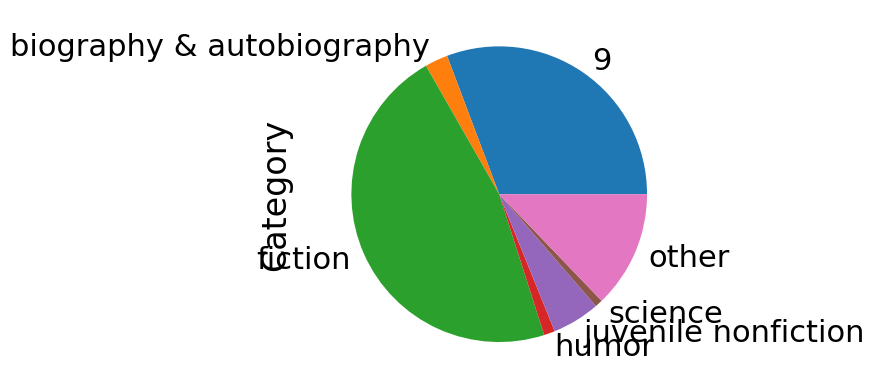

In [33]:
#df_books['Category'] = df_books['Category'].apply(lambda cat: cat if cat!='9' else 'none')
ser_cat = df_books.groupby('Category')['Category'].count()
ser_cat['other']=  ser_cat[ser_cat<=250].sum()

ser_cat[ser_cat>250].plot.pie()
#[df_books.groupby('Category')['Category'].count()>250].sort_values(ascending = False)#.plot.pie()
#plt.title('Number of rating, by book',size=12)
#plt.show()

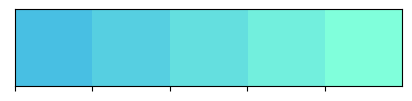

In [7]:
custom_colors = ['#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

sns.set_context("poster")

## with all the reviews

 יש פער משמעותי בהתפלגות הציוניום כשכוללים וכשלא כוללים דירוגים אפסיים

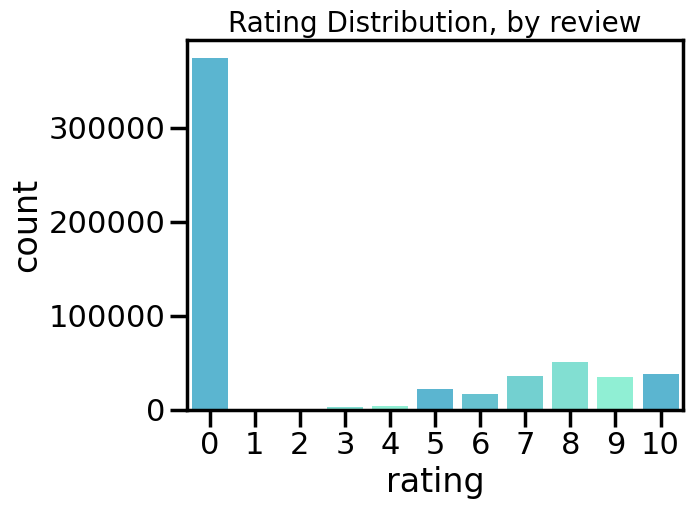

In [14]:
plt.figure()
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

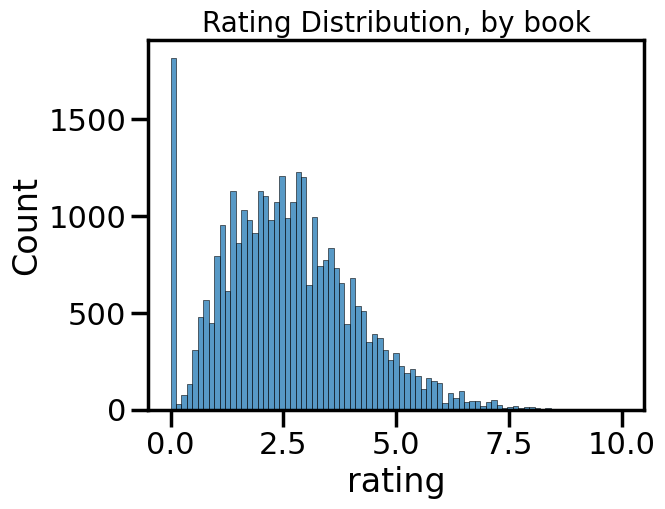

In [195]:
plt.figure()
sns.histplot(x='rating',data=df_books,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

## without 0 reviews:

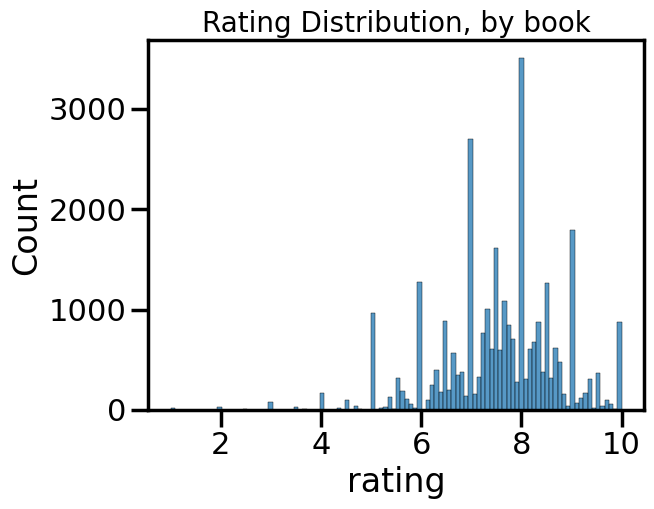

In [19]:
plt.figure()
sns.histplot(x='rating',data=df_books,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

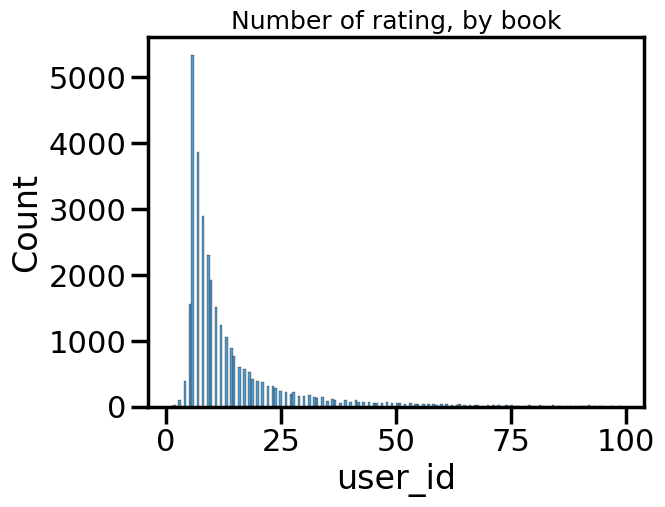

In [29]:
plt.figure()
sns.histplot(x='user_id',data=df_books[df_books['user_id']<100],palette=customPalette)
plt.title('Number of rating, by book',size=18)
plt.show()


In [12]:
df = zero_droper(df)

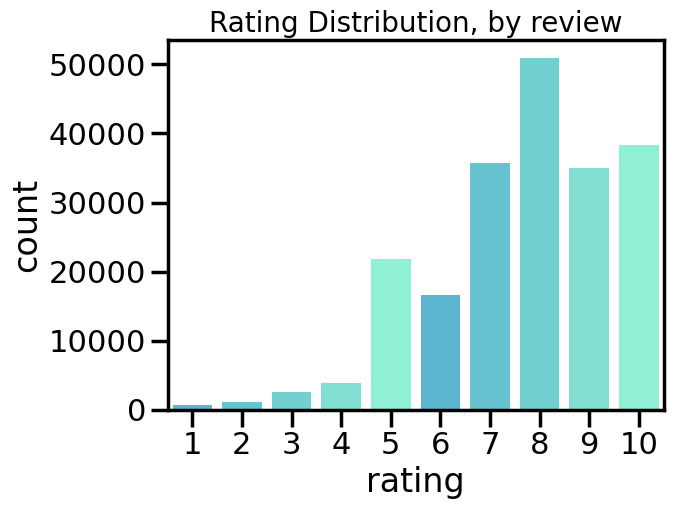

In [16]:
plt.figure()
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

### author

In [18]:
df_author = df_books.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'sum','sum_rating':'sum','publisher':'count'})
df_author['avg_rating'] = df_author['sum_rating']/df_author['user_id']

In [19]:
df_author['log_num_books'] = df_author['publisher'].apply(lambda num: np.log(num))
df_author['log_num_readers'] = df_author['user_id'].apply(lambda num: np.log(num))

df_author=df_author.rename(columns={'publisher':'Total_books_publised','user_id':"Total_readers"})



### with rating 0 review

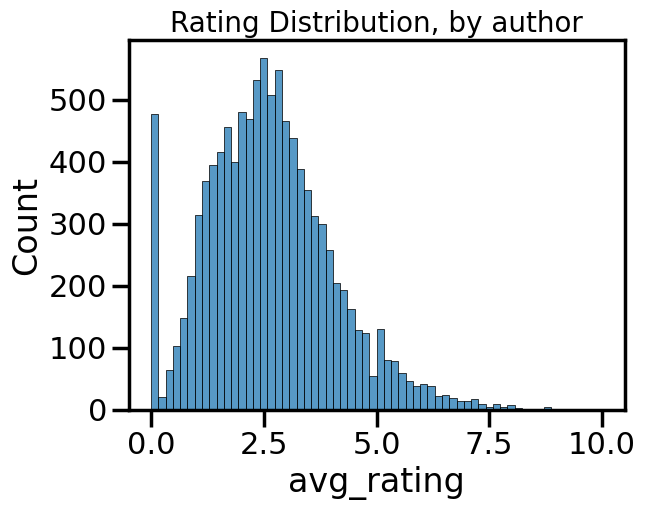

In [198]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

without 0 rating review

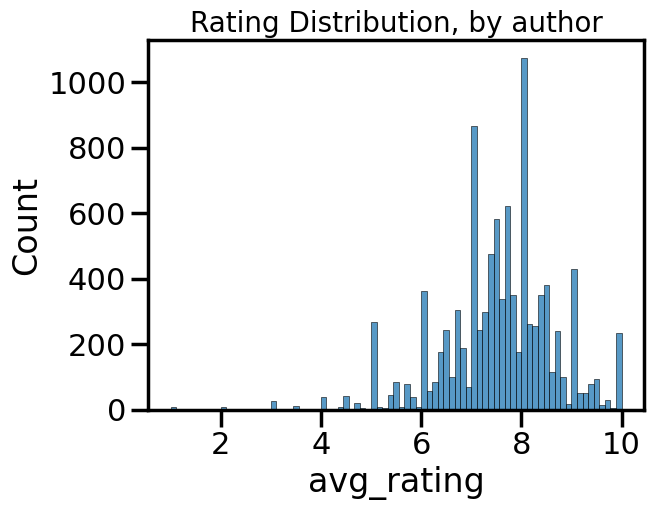

In [16]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

In [21]:
df_author

,Category,Total_readers,sum_rating,Total_books_publised,avg_rating,log_num_books,log_num_readers
book_author,,,,,,,
A A Milne,bears,6,22.0,1,3.666667,0.000000,1.791759
A Adams,fiction,6,0.0,1,0.000000,0.000000,1.791759
A Bodenburg Sommer,art,7,9.0,1,1.285714,0.000000,1.945910
A Lobo Antunes,9,8,26.0,1,3.250000,0.000000,2.079442
A. A. Attanasio,fiction,11,29.0,1,2.636364,0.000000,2.397895
...,...,...,...,...,...,...,...
asha bandele,fiction,6,0.0,1,0.000000,0.000000,1.791759
bell hooks,"[family & relationships, self-help]",11,53.0,2,4.818182,0.693147,2.397895
stephen R Donaldson,character,19,42.0,1,2.210526,0.000000,2.944439


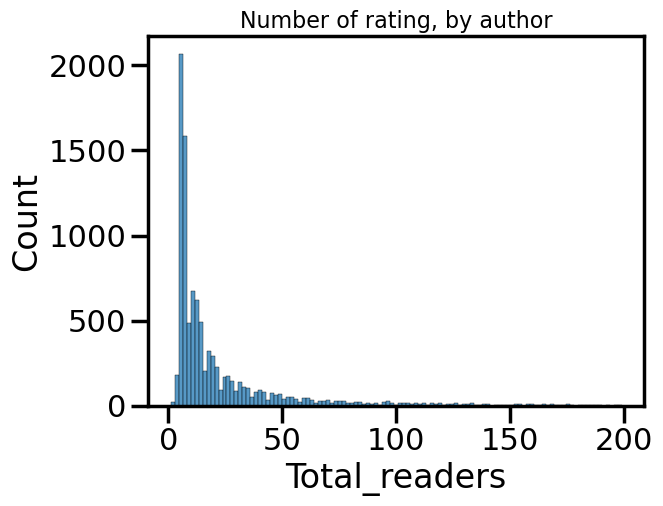

In [28]:
plt.figure()
sns.histplot(x='Total_readers',data=df_author[df_author['Total_readers']<200],palette=customPalette)
plt.title('Number of rating, by author',size=16)
plt.show()


Text(0.5, 1.0, 'log namber of readers')

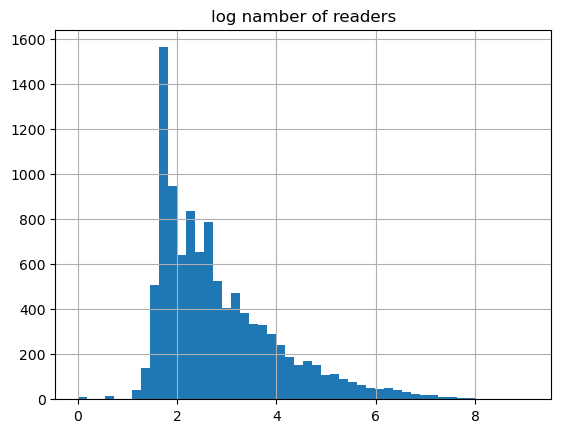

In [169]:
df_author.log_num_readers.hist(bins =50)
plt.title("log namber of readers")

Text(0.5, 1.0, 'log namber of books publish')

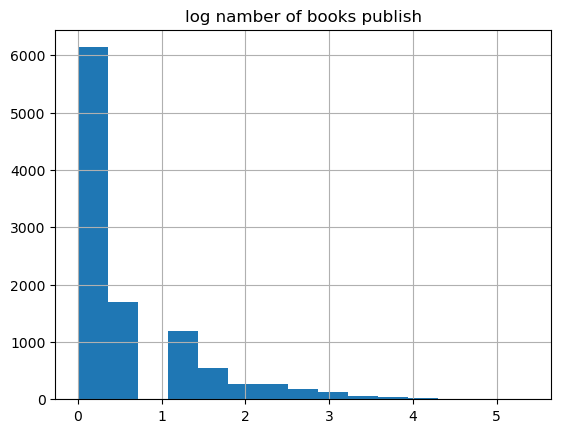

In [170]:
df_author.log_num_books.hist(bins=15)
plt.title("log namber of books publish")

In [ ]:
df_author.groupby(['user_id'])['user_id'].count().apply(lambda num: np.log(num)).hist()

<AxesSubplot:>

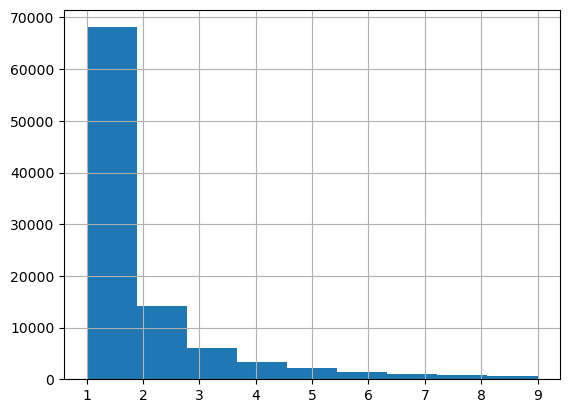

In [93]:
df_author['user_id'][df_author['user_id']<10].hist(bins=9)

<AxesSubplot:>

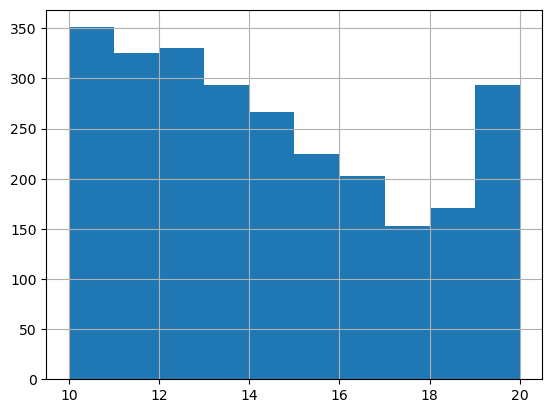

In [171]:
df_author['user_id'][df_author['user_id'].between(10,20)].hist(bins=10)

<AxesSubplot:>

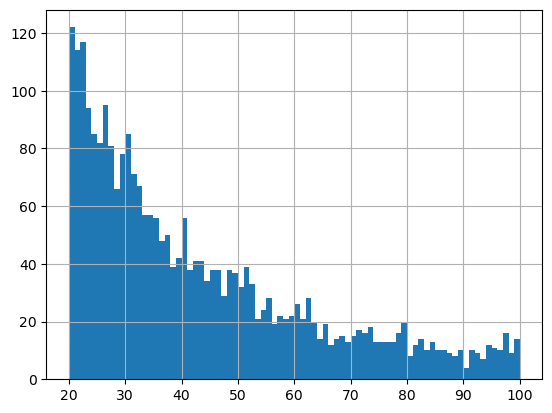

In [172]:
df_author['user_id'][df_author['user_id'].between(20,100)].hist(bins=80)

In [179]:
df_author.corr()

,Total_readers,sum_rating,Total_books_publised,avg_rating,log_num_books,log_num_readers
Total_readers,1.000000,0.971814,0.783984,0.017620,0.519879,0.563469
sum_rating,0.971814,1.000000,0.736097,0.065796,0.483059,0.535391
Total_books_publised,0.783984,0.736097,1.000000,-0.009342,0.746566,0.657801
avg_rating,0.017620,0.065796,-0.009342,1.000000,-0.024864,0.012648
log_num_books,0.519879,0.483059,0.746566,-0.024864,1.000000,0.888713
log_num_readers,0.563469,0.535391,0.657801,0.012648,0.888713,1.000000


In [180]:
df_author.describe()

,Total_readers,sum_rating,Total_books_publised,avg_rating,log_num_books,log_num_readers
count,10544.000000,10544.000000,10544.000000,10544.000000,10544.000000,10544.000000
mean,55.112955,150.888847,3.104514,2.637246,0.574115,2.848498
std,220.785515,648.595551,6.557220,1.424837,0.844846,1.194659
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,16.000000,1.000000,1.666667,0.000000,1.945910
50%,12.000000,33.000000,1.000000,2.533333,0.000000,2.484907
75%,31.000000,81.000000,3.000000,3.439268,1.098612,3.433987
max,8795.000000,31051.000000,217.000000,10.000000,5.379897,9.081939


# without 0 rating:

In [17]:
df_books = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books['sum_rating'] = df_books['rating']*df_books['user_id']

In [221]:
df_non0 = df[df['rating']!=0] 

In [222]:
df_books_non0 = df_non0.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books_non0['sum_rating'] = df_books_non0['rating']*df_books_non0['user_id']

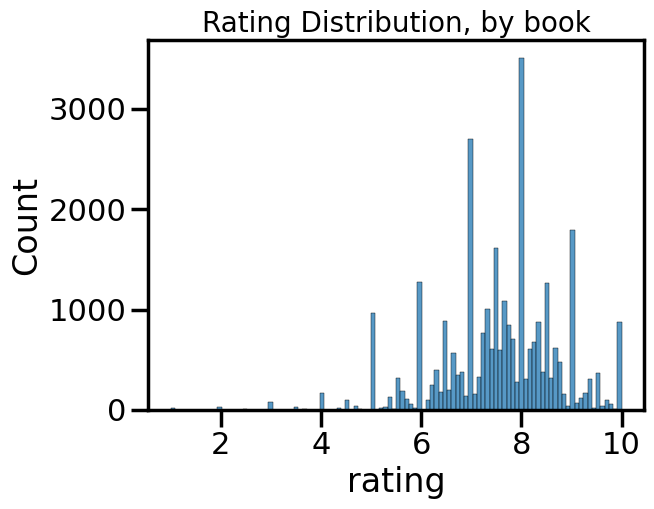

In [18]:
plt.figure()
sns.histplot(x='rating',data=df_books,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

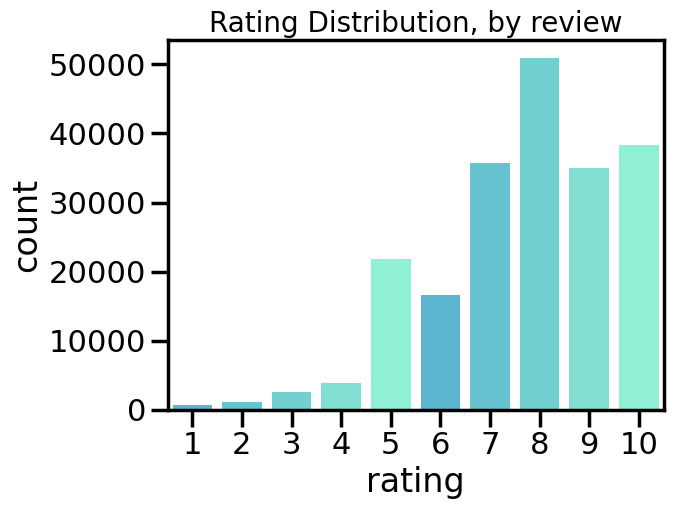

In [224]:
plt.figure()
sns.countplot(x='rating',data=df_new_non0,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

### author

In [225]:


df_author_non0 = df_books_non0.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'sum','sum_rating':'sum','publisher':'count'})
df_author_non0['avg_rating'] = df_author_non0['sum_rating']/df_author_non0['user_id']

In [227]:
df_author_non0['log_num_books'] = df_author_non0['publisher'].apply(lambda num: np.log(num))
df_author_non0['log_num_readers'] = df_author_non0['user_id'].apply(lambda num: np.log(num))

df_author_non0=df_author_non0.rename(columns={'publisher':'Total_books_publised','user_id':"Total_readers"})



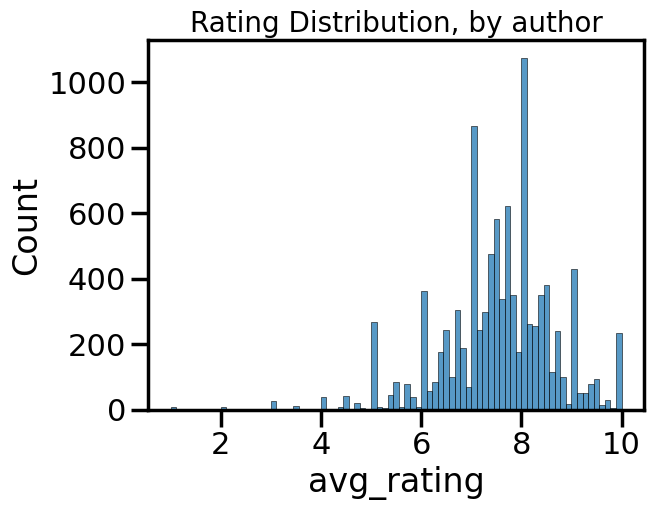

In [228]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author_non0,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

Text(0.5, 1.0, 'log namber of readers')

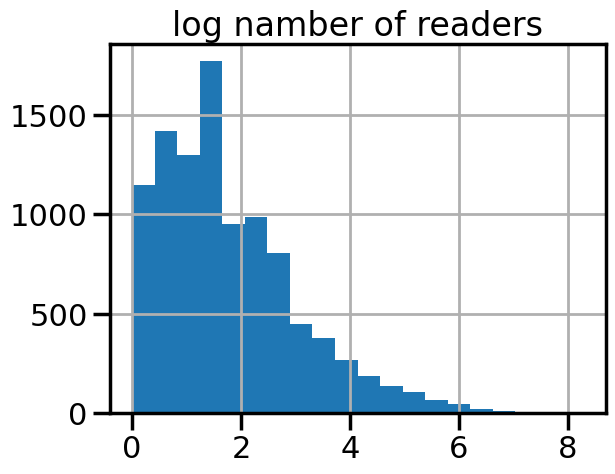

In [230]:
df_author_non0.log_num_readers.hist(bins =20)
plt.title("log namber of readers")

<AxesSubplot:>

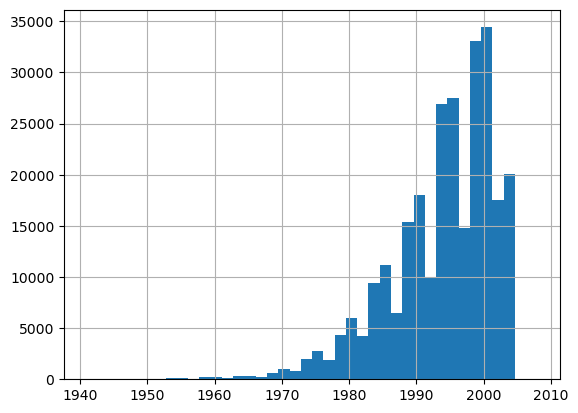

In [48]:
df_books['year_of_publication'][df_books['year_of_publication']>1940].hist(bins =40)

120328 books with rating 0, out of 270170 total books

85760 of the zero books got 1 reader, 21693 got 2 reader.

In [25]:
df_books_zero = df_books[df_books['rating']==0]

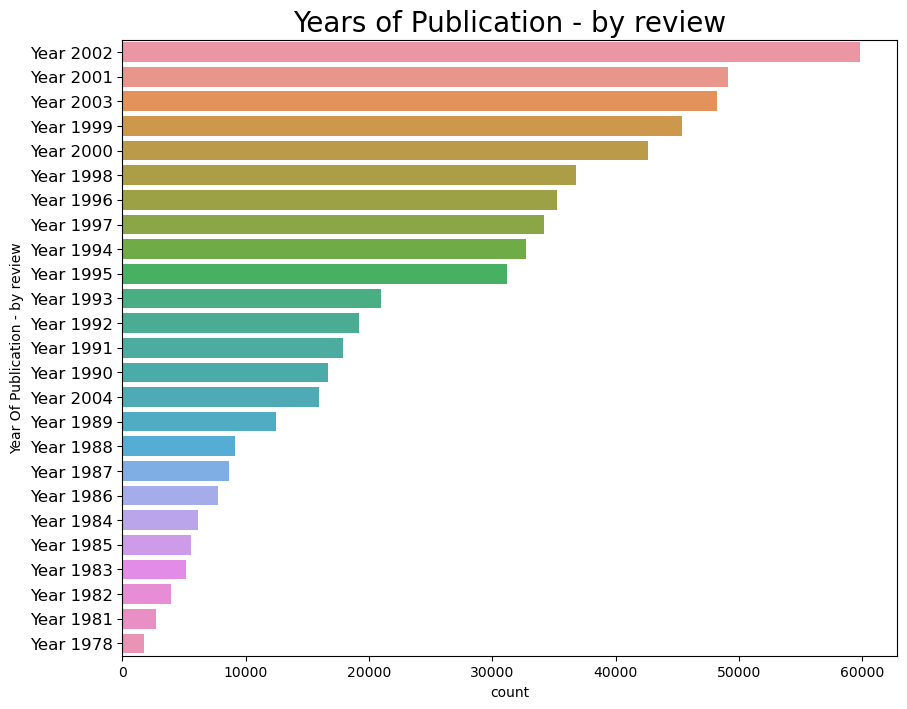

In [184]:
df_v=df_new[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication - by review')
plt.yticks(size=12)
plt.title('Years of Publication - by review',size=20)
plt.show()

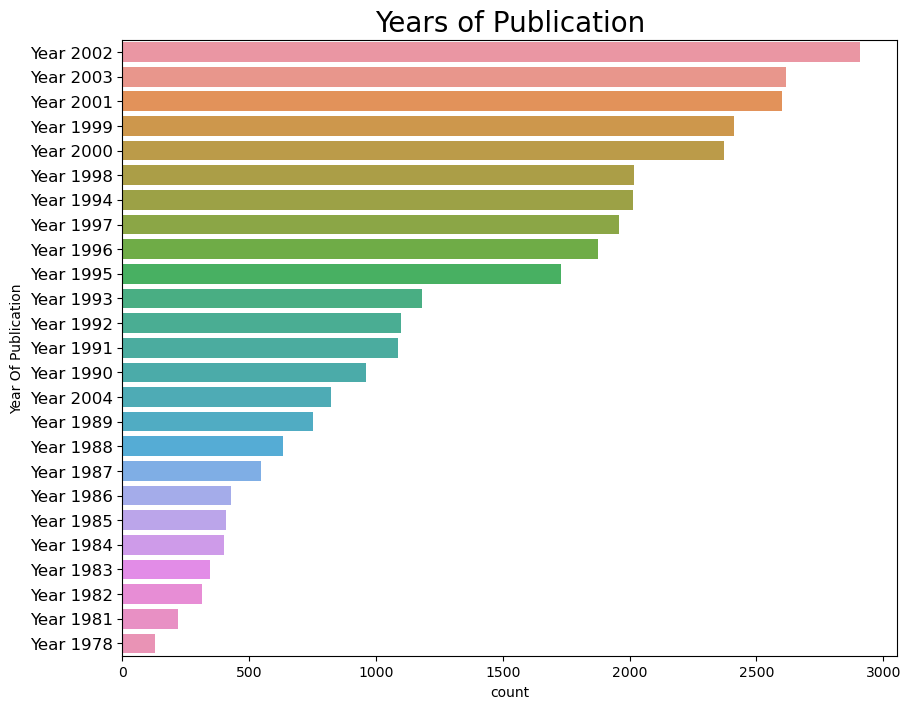

In [183]:
df_v=df_books[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

there is 2 diffrent iranian readers that read books from years before 1800